Sentiment Analysis of Opay Playstore App Review

In [1]:
# Libraries and modules for the sentiment analysis
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import joblib

import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kings\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
opay = pd.read_csv('opay.csv')

In [3]:
opay.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,c7a6c78d-6e34-4d15-b2c6-8447b6e56ed6,Omotosho Gift,https://play-lh.googleusercontent.com/a/ALm5wu...,I personally love the fact that there's no fee...,4,101,5.4.3.97,2022-11-14 17:18:35,"Hi Omotosho, Thank you for taking out the time...",2022-11-15 08:14:10
1,3850aef0-f176-4f66-8f8e-f490a37fc5f4,Love Ifejiofor,https://play-lh.googleusercontent.com/a/ALm5wu...,Amazing app is all I can say. Better than trad...,5,1233,5.1.3.74,2022-09-12 12:04:38,"Hi Love, Thank you for taking out the time to ...",2022-09-12 12:33:09
2,5a162618-762f-4af1-9f8a-e6a1a1d86dd2,Dauda Olamilekan,https://play-lh.googleusercontent.com/a/ALm5wu...,In fact is the best among the rest. I love it....,5,2025,5.1.5.76,2022-09-23 20:59:00,"Hi Dauda, Thank you for taking out the time to...",2022-09-24 10:08:19
3,2f782fd8-9b09-494f-bdfd-66e9dd565b1d,elonwa john,https://play-lh.googleusercontent.com/a/ALm5wu...,Opay is really a great app. And they are doing...,4,2774,5.1.3.74,2022-09-15 10:36:41,"Hi Elonwa, Thank you for taking out the time t...",2022-09-16 11:47:41
4,c2bc02d5-8af6-43cc-9594-daafbcd23373,prince Adeyemi Adelowo,https://play-lh.googleusercontent.com/a-/ACNPE...,I think the app is fantastic.. one feature tha...,3,290,5.3.0.91,2022-11-06 05:36:49,"Hi Prince, Thank you for taking out the time t...",2022-11-07 09:18:05


In [4]:
opay.shape

(106763, 10)

In [5]:
opay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106763 entries, 0 to 106762
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              106763 non-null  object
 1   userName              106763 non-null  object
 2   userImage             106763 non-null  object
 3   content               106763 non-null  object
 4   score                 106763 non-null  int64 
 5   thumbsUpCount         106763 non-null  int64 
 6   reviewCreatedVersion  90405 non-null   object
 7   at                    106763 non-null  object
 8   replyContent          99887 non-null   object
 9   repliedAt             99887 non-null   object
dtypes: int64(2), object(8)
memory usage: 8.1+ MB


In [6]:
opay.describe()

,score,thumbsUpCount
count,106763.000000,106763.000000
mean,4.232075,1.235962
std,1.329435,28.029866
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,2880.000000


In [7]:
opay.isnull().sum()

reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    16358
at                          0
replyContent             6876
repliedAt                6876
dtype: int64

In [8]:
# This Function is to clean the dataset and remove the noise
def cleanData(data):
  data = re.sub(r'@[A-Za-z0-9_]+', '', data) # this will remove the @ mentions
  data = re.sub(r'#', '', data) # this will remove the # symbols
  data = re.sub(r'https?:\/\/\s+', '', data) # This will remove the hyperlink
  data = re.sub(r'\n+', '', data) # This will removes all mention of \n
  data = re.sub(r'_', '', data) # This will remove _
  data = re.sub(r'[0-9]', '', data) # This will remove numbers
  data = data.lower()
  data = data.split()
  data = [ps.stem(word) for word in data if not word in set(all_stopwords)]
  data = ' '.join(data)
  return data

In [9]:
opay['review'] = opay['content'].apply(cleanData)

In [10]:
# Create a function to get the subjectivity. This tells the subjectivity of the users
def reviewSubjectivity(data):
  return TextBlob(data).sentiment.subjectivity

In [11]:
# New column for the subjectivity
opay['subjectivity'] = opay['review'].apply(reviewSubjectivity)

In [12]:
# Create a function that tells the polarity of the review
def reviewPolarity(data):
  return TextBlob(data).sentiment.polarity

In [13]:
# New column for the polarity
opay['polarity'] = opay['review'].apply(reviewPolarity)

In [14]:
opay.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review,subjectivity,polarity
0,c7a6c78d-6e34-4d15-b2c6-8447b6e56ed6,Omotosho Gift,https://play-lh.googleusercontent.com/a/ALm5wu...,I personally love the fact that there's no fee...,4,101,5.4.3.97,2022-11-14 17:18:35,"Hi Omotosho, Thank you for taking out the time...",2022-11-15 08:14:10,person love fact there' fee transaction. notic...,0.366667,0.225000
1,3850aef0-f176-4f66-8f8e-f490a37fc5f4,Love Ifejiofor,https://play-lh.googleusercontent.com/a/ALm5wu...,Amazing app is all I can say. Better than trad...,5,1233,5.1.3.74,2022-09-12 12:04:38,"Hi Love, Thank you for taking out the time to ...",2022-09-12 12:33:09,amaz app say. better tradit bank apps. intrigu...,0.625000,0.650000
2,5a162618-762f-4af1-9f8a-e6a1a1d86dd2,Dauda Olamilekan,https://play-lh.googleusercontent.com/a/ALm5wu...,In fact is the best among the rest. I love it....,5,2025,5.1.5.76,2022-09-23 20:59:00,"Hi Dauda, Thank you for taking out the time to...",2022-09-24 10:08:19,fact best among rest. love it. easi whatev wan...,0.516667,0.616667
3,2f782fd8-9b09-494f-bdfd-66e9dd565b1d,elonwa john,https://play-lh.googleusercontent.com/a/ALm5wu...,Opay is really a great app. And they are doing...,4,2774,5.1.3.74,2022-09-15 10:36:41,"Hi Elonwa, Thank you for taking out the time t...",2022-09-16 11:47:41,opay realli great app. realli well. suggest th...,0.522222,0.211111
4,c2bc02d5-8af6-43cc-9594-daafbcd23373,prince Adeyemi Adelowo,https://play-lh.googleusercontent.com/a-/ACNPE...,I think the app is fantastic.. one feature tha...,3,290,5.3.0.91,2022-11-06 05:36:49,"Hi Prince, Thank you for taking out the time t...",2022-11-07 09:18:05,think app fantastic.. one featur would like ad...,0.433333,0.083333


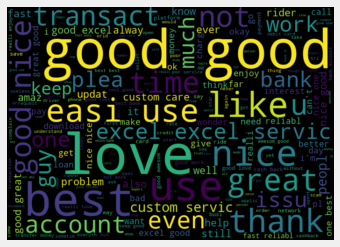

In [15]:
# Create a word cloud for the tweet which will visualize the frequently used words
alltexts = ' '.join([word for word in opay['review']])
wordcloud = WordCloud(width = 700, height = 500, random_state = 21, max_font_size = 120, stopwords = ['opay', 'app', 'https', 'http']).generate(alltexts)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [16]:
# Create a function to compute the negative, neutral and politive analysis
def polarityAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [17]:
# Create new column that checks the analysis of the polarity
opay['Analysis'] = opay['polarity'].apply(polarityAnalysis)

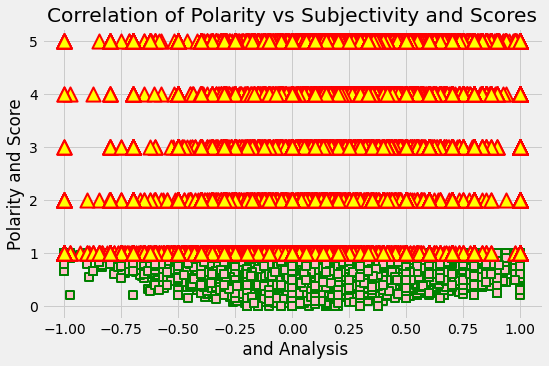

In [19]:
# Plot a scatter plot of the polarity and subjectivity of the tweets
plt.figure(figsize=(8,5))
plt.scatter(opay['polarity'], opay['subjectivity'], c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)

plt.title('Correlation of Polarity vs Subjectivity')
plt.xlabel(" and Analysis")
plt.ylabel("Polarity and Score")
plt.show()

In [ ]:
plt.scatter(opay['polarity'], opay['score'], c ="yellow",
            linewidths = 2,
            marker ="^",
            edgecolor ="red",
            s = 200)

plt.title('Correlation of Polarity vs Subjectivity and Scores')
plt.xlabel(" and Analysis")
plt.ylabel("Polarity and Score")
plt.show()